## Haberman Data Analysis

description of dataset from(https://www.kaggle.com/gilsousa/habermans-survival-data-set) tells about the survival of patients who undergwent breast cancer surgery.In this data set the independent variable is "status" (which tells whether the patient survived or not ) and the dependent variables are age (the age when the patient underwent surgery) , year (the year when surgery was performed), nodes (no. of nodes present).Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = pd.read_csv('haberman.csv')
x

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [3]:
y= x.rename(columns={'30': 'Age','64':'op_year','1':'axil_nodes','1.1':'surv_status'},inplace = False)
y

,Age,op_year,axil_nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [4]:
y.shape

(305, 4)

In [5]:
y.isnull()

,Age,op_year,axil_nodes,surv_status
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
300,False,False,False,False
301,False,False,False,False
302,False,False,False,False
303,False,False,False,False


Since the shape of y.isnull is false, there is no null values in it.

In [6]:
y["surv_status"].value_counts()

1    224
2     81
Name: surv_status, dtype: int64

so as we can see the patient who survived for longer period are more than the patients who survived for shorter period 


##Univariate analysis


age

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


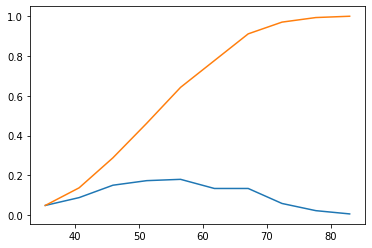

In [7]:
counts, bin_edges = np.histogram(y["Age"], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


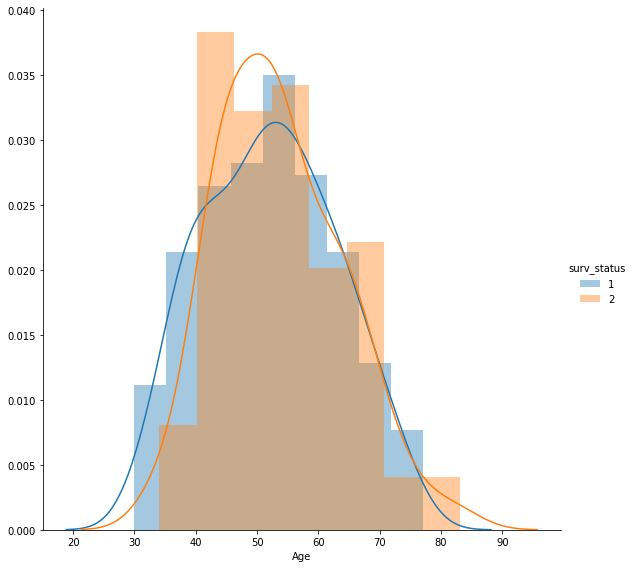

In [8]:
sns.FacetGrid(y,hue="surv_status", size=8)\
.map(sns.distplot,"Age")\
.add_legend()

1. 0-40 age -> chances of survival is high
2. 40-57 age -> chances of survival is least
3. after 57-75 -> almost same
4. 75 years onwards most people survived for shorter period of time

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


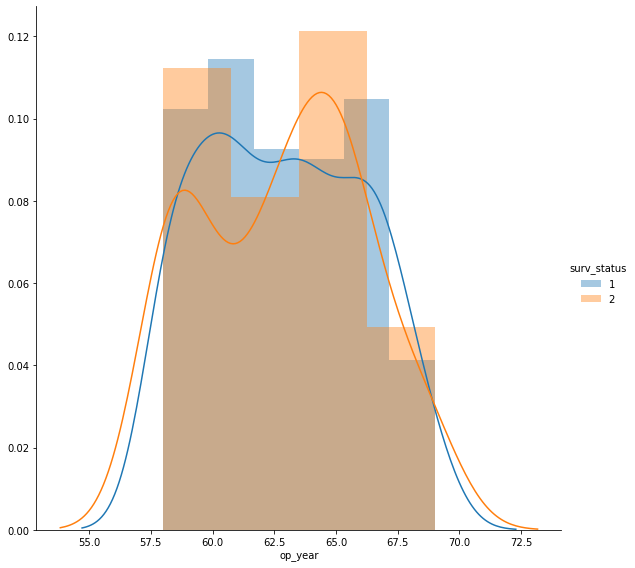

In [9]:
sns.FacetGrid(y,hue="surv_status", size=8)\
.map(sns.distplot,"op_year")\
.add_legend()

after 62.5 year the trend is opposite

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


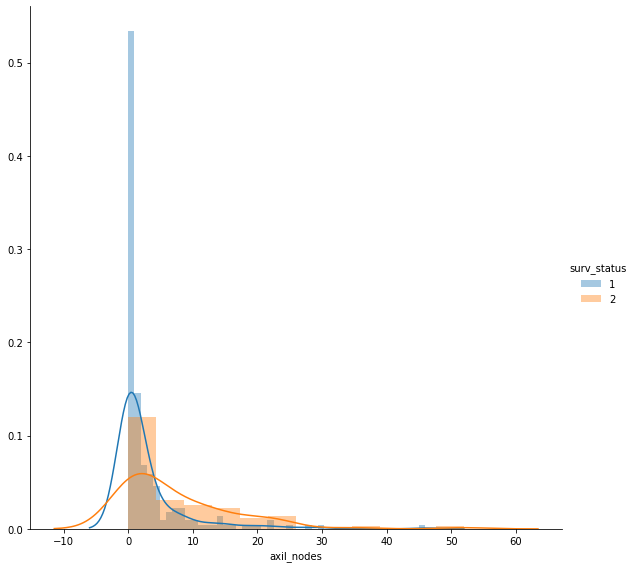

In [10]:
sns.FacetGrid(y,hue="surv_status", size=8)\
.map(sns.distplot,"axil_nodes")\
.add_legend()

0-5 -> survival chances are more than 5 years
after 5 majority of people's survival is less than 5 years

boxplot

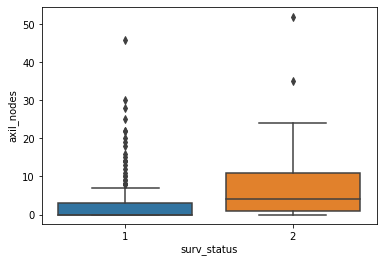

In [11]:
sns.boxplot(x="surv_status",y="axil_nodes", data=y)
plt.show()

majority of people surviving less than 5 years would be having more than 3 axil node.
majority of people surviving more than 5 years have axil nodes in between 0-3. 


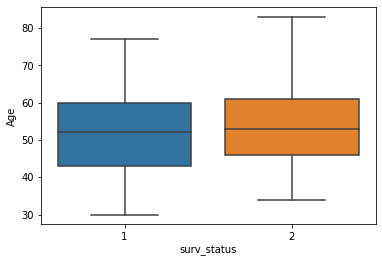

In [12]:
sns.boxplot(x="surv_status",y="Age", data=y)
plt.show()

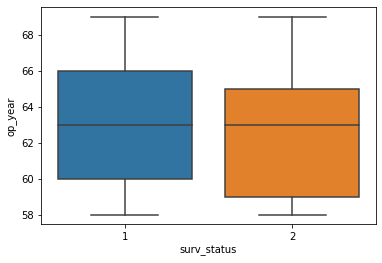

In [13]:
sns.boxplot(x="surv_status",y="op_year", data=y)
plt.show()

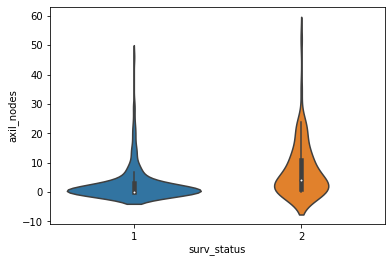

In [14]:
sns.violinplot(x="surv_status",y="axil_nodes",data = y , size = 8)
plt.show()

Bi-variate analysis


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


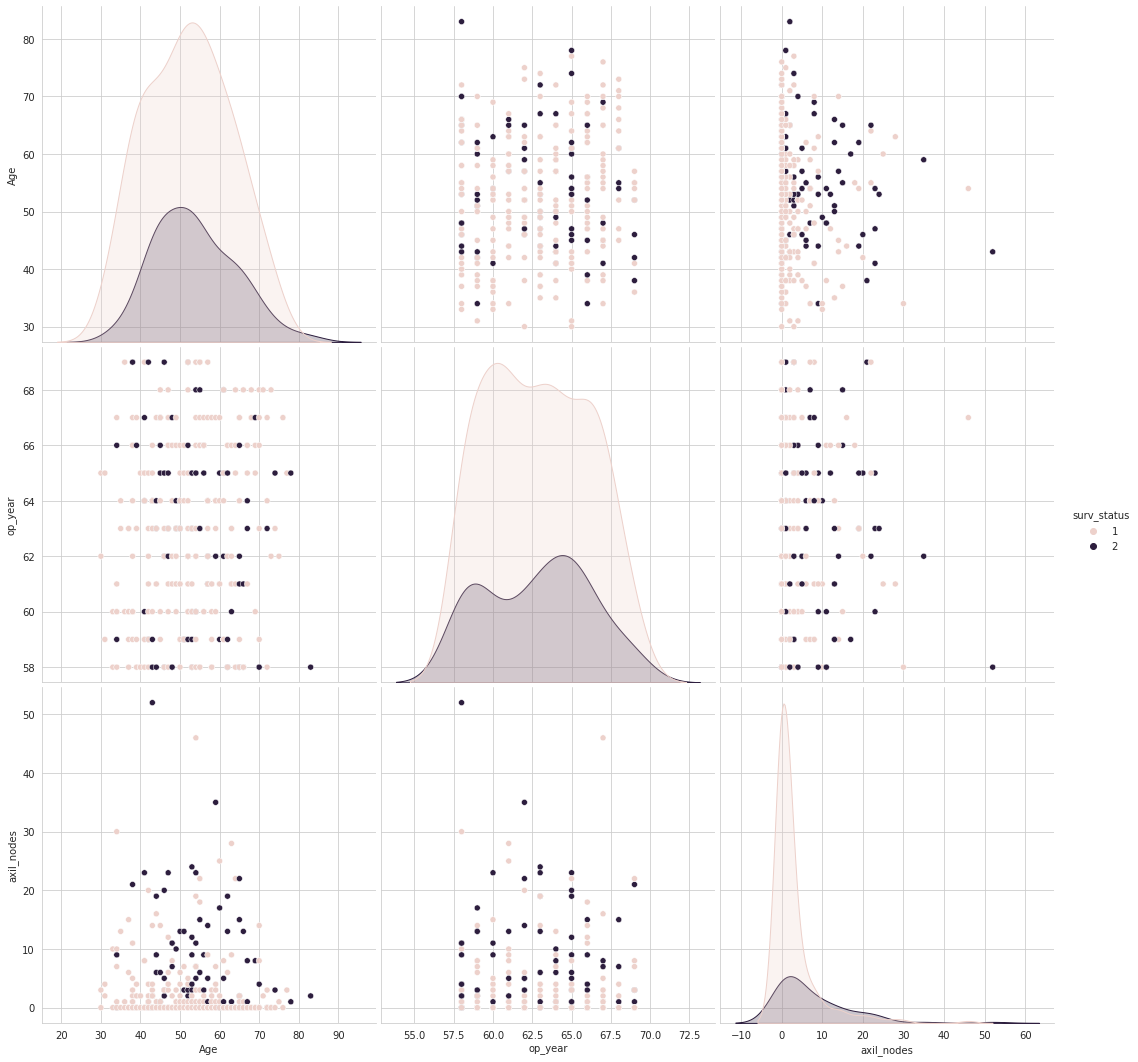

In [15]:
plt.close()

sns.set_style("whitegrid")

sns.pairplot(y,hue="surv_status",size =5)

plt.show()

One graph of Age versus axil_nodes says that if the age is below 45 years and axil nodes in between 0-20, chances of survival after 5 years is more.
if, the age is above 45 yeaars with axil_nodes in between 10-20, the chances of less than 5 years is more.